# Housing Case Study

## Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


We are required to model the price of houses with the available independent variables. Since, output variable is an continuous variable, so it's an regression problem.

## Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the train and test dataset
train_df=pd.read_csv("C:\Users\Sankalp\Downloads\Project-Housing\Project-Housing_splitted\train.csv")
test_df=pd.read_csv("C:\Users\Sankalp\Downloads\Project-Housing\Project-Housing_splitted\test.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)

(1168, 81)
(292, 14)


Total test points available for training model to get best fit are 1168. 

80 Independent columns and 1 dependent

In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Observation:

i. Output variable is SalePrice

ii. Outliers are present in almost all the continous variables

iii. We can drop Id column, as it's not helpful for prediction.

iv. ScreenPorch, PoolArea, 3SsnPorch and Enclosed porch are highly correlated. With outliers as expectd, 
    since not all house have pool or Porch.

In [5]:
#Data types
print("Data types of train Data")
for sCol in train_df.columns:
    print(sCol,train_df[sCol].dtype)

print("*"*100)
print("Data types of test Data")
for sCol in test_df.columns:
    print(sCol,test_df[sCol].dtype)


Data types of train Data
Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces

Observation:

Data type of each column in train and test data is valid and no need to change the data type

### Missing value Analysis

In [6]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64


In [7]:
# Before imputing missing values, let's remove ID column first from train and test data set.
train_df.drop('Id',inplace=True,axis=1)
test_df.drop('Id',inplace=True,axis=1)

In [8]:
# Check for object variable to have an idea whether mode is an good fit to impute values in case of 
# categorical variables
print(train_df['MSZoning'].value_counts())
# Mode is a good fit to impute values
# We will replace continuous variables by median as data contains outliers.

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


In [9]:
# Imputing missing values
med=0
mod=''
for iActiveCol in train_df.columns:
    if train_df[iActiveCol].dtype=='int' or train_df[iActiveCol].dtype=='float':
        # imputing continuous variables with the median
        med=train_df[iActiveCol].median()
        train_df[iActiveCol].fillna(value=med,inplace=True)
    elif train_df[iActiveCol].dtype=='object':
        train_df[iActiveCol]=pd.DataFrame(map(str,train_df[iActiveCol]))
        #imputing categorical variable with the mode
        mod=train_df[iActiveCol].mode()
        train_df[iActiveCol].fillna(value=mod,inplace=True)

In [10]:
# Imputing missing values for test_df
# Imputing missing values
med=0
mod=''
for iActiveCol in test_df.columns:
    if test_df[iActiveCol].dtype=='int' or test_df[iActiveCol].dtype=='float':
        # imputing continuous variables with the median
        med=test_df[iActiveCol].median()
        print(iActiveCol)
        print(med)
        test_df[iActiveCol].fillna(value=med,inplace=True)
    elif test_df[iActiveCol].dtype=='object':
        
        test_df[iActiveCol]=pd.DataFrame(map(str,test_df[iActiveCol]))
        #imputing categorical variable with the mode
        print(mod)
        test_df[iActiveCol].fillna(value=mod,inplace=True)

MSSubClass
50.0

LotFrontage
65.0
LotArea
9200.0












OverallQual
6.0
OverallCond
5.0
YearBuilt
1976.0
YearRemodAdd
1994.0





MasVnrArea
0.0







BsmtFinSF1
369.5

BsmtFinSF2
0.0
BsmtUnfSF
487.0
TotalBsmtSF
971.0




1stFlrSF
1047.5
2ndFlrSF
0.0
LowQualFinSF
0.0
GrLivArea
1440.0
BsmtFullBath
0.0
BsmtHalfBath
0.0
FullBath
2.0
HalfBath
0.0
BedroomAbvGr
3.0
KitchenAbvGr
1.0

TotRmsAbvGrd
6.0

Fireplaces
1.0


GarageYrBlt
1979.0

GarageCars
2.0
GarageArea
467.5



WoodDeckSF
0.0
OpenPorchSF
28.5
EnclosedPorch
0.0
3SsnPorch
0.0
ScreenPorch
0.0
PoolArea
0.0
PoolQC
nan


MiscVal
0.0
MoSold
6.0
YrSold
2008.0




In [11]:
# Missing value imputation is done
print("Total missing values in train data set are {}".format(sum(train_df.isnull().sum())))
print("Total missing values in test data set are {}".format(sum(test_df.isnull().sum())))

Total missing values in train data set are 0
Total missing values in test data set are 292


In [12]:
# After printing mode values found out that nan values in column PoolQC have not been replaced.
L=list(test_df['PoolQC'])
print(L) # All are Nan  values, so NO valuable info is available. 
#It's better to drop PoolQC column from train and test_data

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [13]:
# Dropping PoolQC column
train_df.drop('PoolQC',axis=1,inplace=True)
test_df.drop('PoolQC',axis=1,inplace=True)

In [14]:
print("Total missing values in train data set are {}".format(sum(train_df.isnull().sum())))
print("Total missing values in test data set are {}".format(sum(test_df.isnull().sum())))
#All missing values from train and test data have been imputed

Total missing values in train data set are 0
Total missing values in test data set are 0


## Outlier Analysis

In [15]:
#Collecting continuous variables to remove outliers
ContVar_list=[]
DiscVar_list=[]
for iActiveCol in train_df.columns:
    if train_df[iActiveCol].dtype=='int' or train_df[iActiveCol].dtype=='float':
        ContVar_list.append(iActiveCol)
    else:
        DiscVar_list.append(iActiveCol)

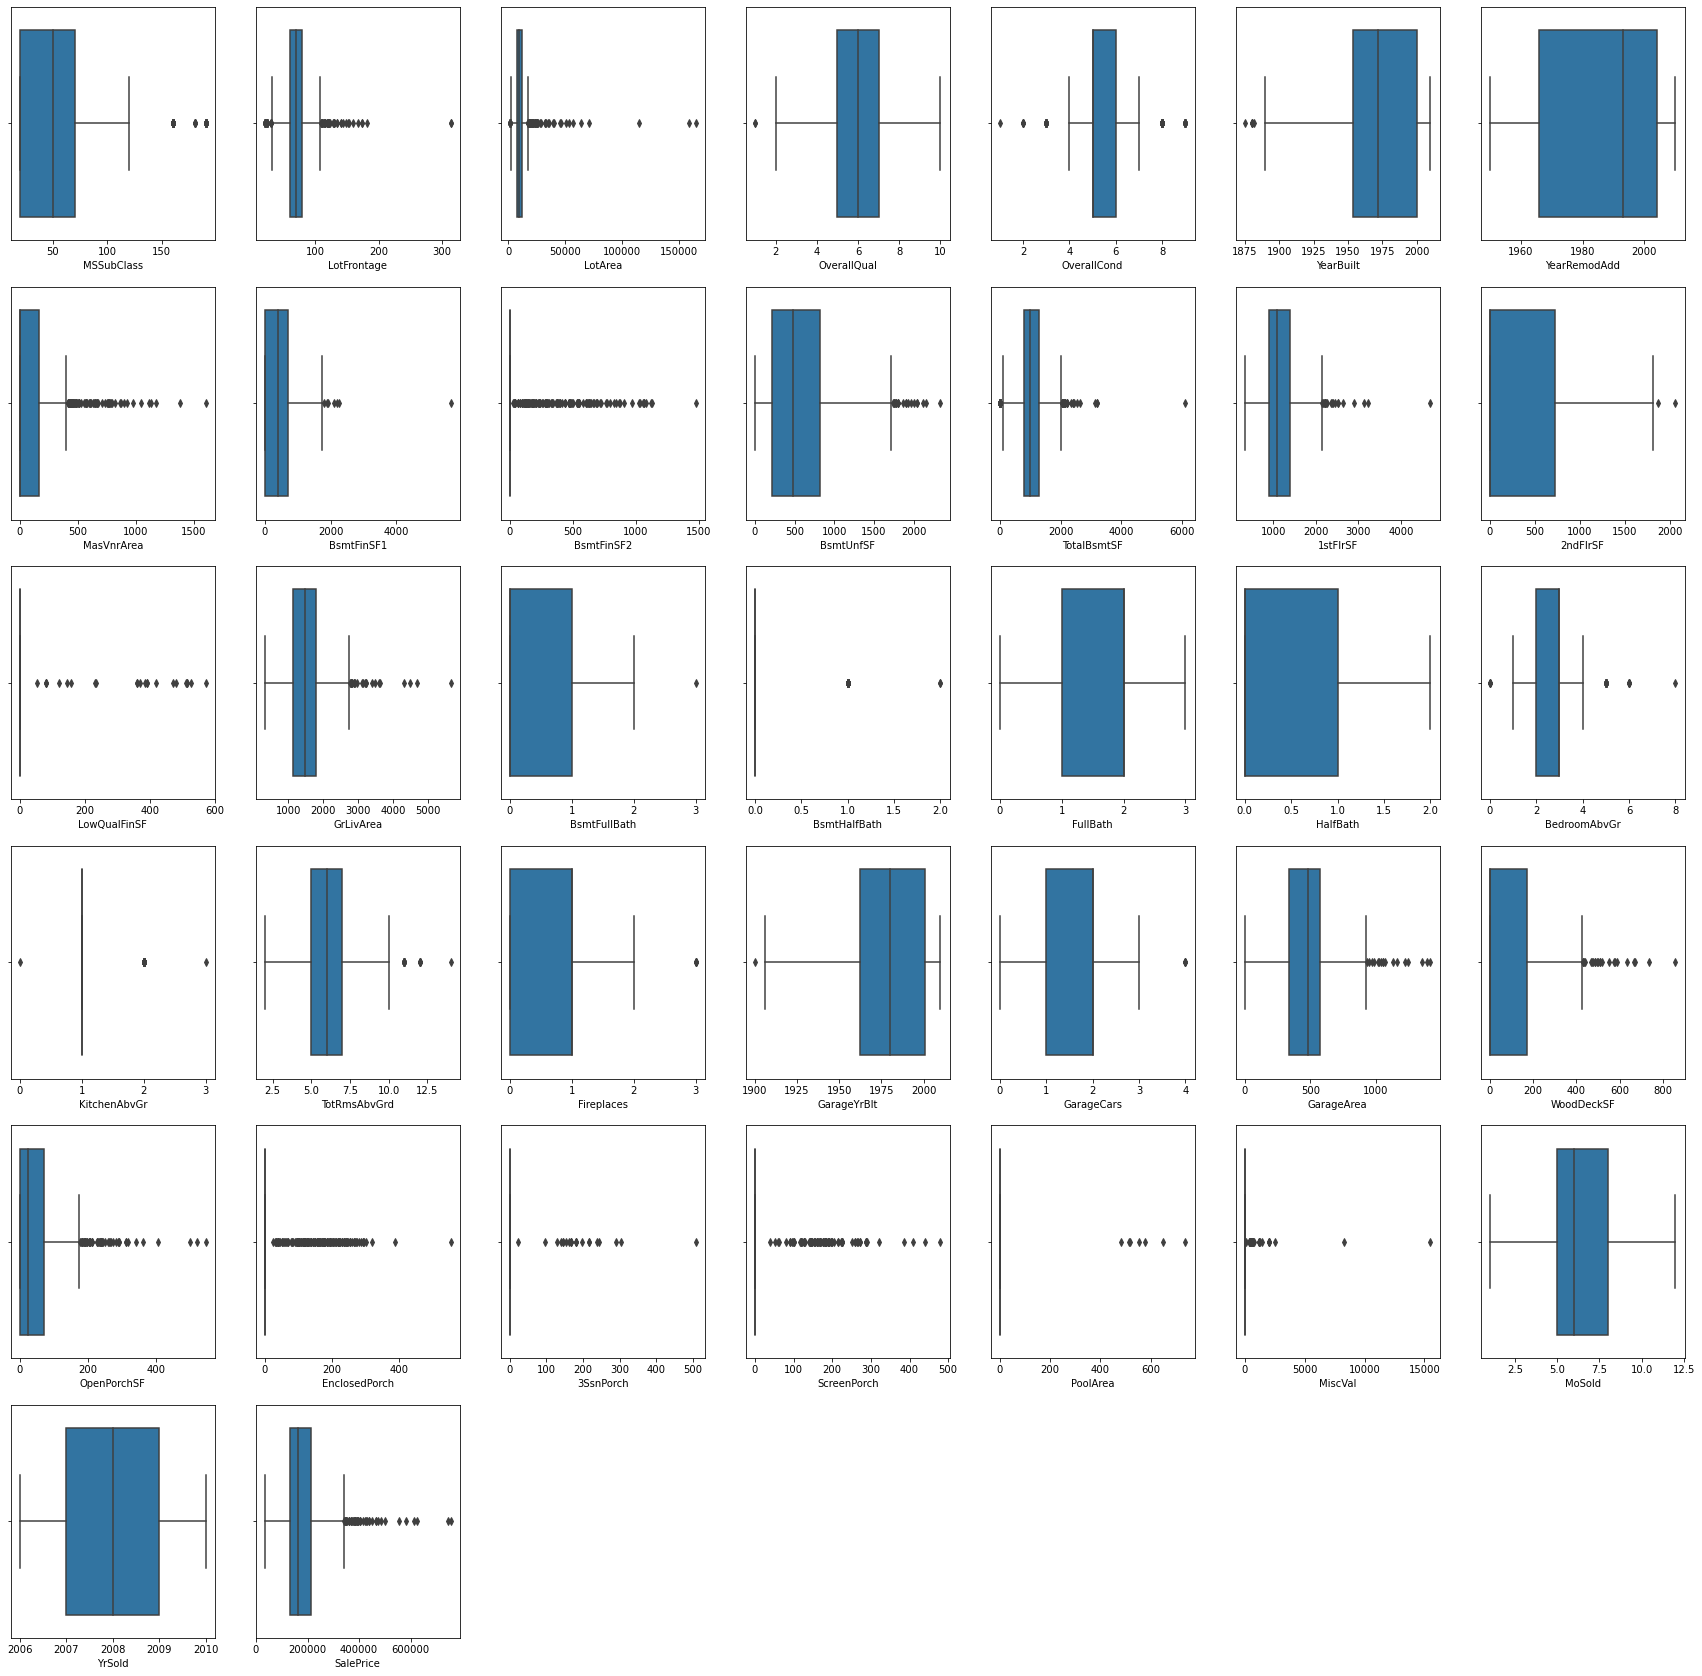

In [16]:
plt.figure(figsize=(30,30))
for iActiveCol in enumerate(ContVar_list):
    plt.subplot(6,7,iActiveCol[0]+1)
    sns.boxplot(train_df[iActiveCol[1]])
# As we can see there are outliers present in the data.

In [17]:
# I will be using box plot approach to remove the outliers
# Removal of outliers using boxplot approach.
train_copy=train_df.copy()
    
for col in ContVar_list:
    q75,q25=np.percentile(train_df.loc[:,col],[75,25])
    # Calculating inter quartile range
    iqr=q75-q25
    # Calculating min and max threshold for being an outlier point.
    minThresh=q25-(iqr*1.5)
    maxThresh=q75+(iqr*1.5)
    
    train_copy=train_copy.drop(train_copy[train_copy.loc[:,col]<minThresh].index)
    train_copy=train_copy.drop(train_copy[train_copy.loc[:,col]>maxThresh].index)

In [18]:
train_copy.describe()
#Outliers have been removed, as we can see in the below table. 
#Difference between 75%le and max values are reduced

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  451.000000   451.000000    451.000000   451.000000   451.000000   
mean    48.004435    69.308204   9256.210643     6.221729     5.390244   
std     30.915799    13.349337   2724.689141     1.268268     0.726203   
min     20.000000    32.000000   2887.000000     2.000000     4.000000   
25%     20.000000    63.000000   7800.000000     5.000000     5.000000   
50%     50.000000    70.000000   9084.000000     6.000000     5.000000   
75%     60.000000    75.000000  10800.000000     7.000000     6.000000   
max    120.000000   108.000000  17217.000000    10.000000     7.000000   

         YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  BsmtFinSF2  ...  \
count   451.000000    451.000000  451.000000   451.000000       451.0  ...   
mean   1982.800443   1988.707317   71.780488   440.478936         0.0  ...   
std      25.413734     19.992741  103.165835   412.276300         0.0  ...   
min    1910.000000   1950.000000    0.000000     0.000000         0.0  ...   
25%    1964.000000   1971.000000    0.000000     0.000000         0.0  ...   
50%    1995.000000   1999.000000    0.000000   432.000000         0.0  ...   
75%    2004.000000   2005.000000  133.500000   744.000000         0.0  ...   
max    2009.000000   2010.000000  391.000000  1619.000000         0.0  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  451.000000   451.000000          451.0      451.0        451.0   
mean    93.627494    42.274945            0.0        0.0          0.0   
std    101.171773    46.517378            0.0        0.0          0.0   
min      0.000000     0.000000            0.0        0.0          0.0   
25%      0.000000     0.000000            0.0        0.0          0.0   
50%    100.000000    33.000000            0.0        0.0          0.0   
75%    168.000000    64.500000            0.0        0.0          0.0   
max    426.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal      MoSold       YrSold      SalePrice  
count     451.0    451.0  451.000000   451.000000     451.000000  
mean        0.0      0.0    6.396896  2007.773836  180031.674058  
std         0.0      0.0    2.551669     1.349017   56117.597763  
min         0.0      0.0    1.000000  2006.000000   37900.000000  
25%         0.0      0.0    5.000000  2007.000000  137750.000000  
50%         0.0      0.0    6.000000  2008.000000  176485.000000  
75%         0.0      0.0    8.000000  2009.000000  215000.000000  
max         0.0      0.0   12.000000  2010.000000  339750.000000  

[8 rows x 37 columns]

In [19]:
print(train_copy.shape)

print("Data loss percentage after removing outliers is {}".format((train_df.shape[0]-train_copy.shape[0])/train_df.shape[0]))


(451, 79)
Data loss percentage after removing outliers is 0.6138698630136986


Observation:

i. Initially we had 1168 instances. After removing outliers, we endup having 458 points.

ii. Data loss is almost 61%, which is huge. 

iii. I will try to reduce the effect of outliers in the data. By aplying logarithmic function.

In [20]:
# Let's do further analysis.

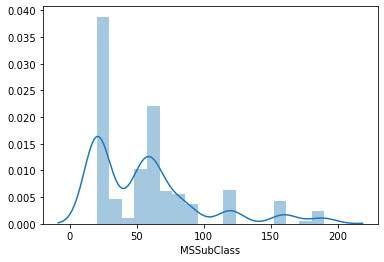

In [21]:
#Distribution of MSSubclass
sns.distplot(train_df['MSSubClass'])

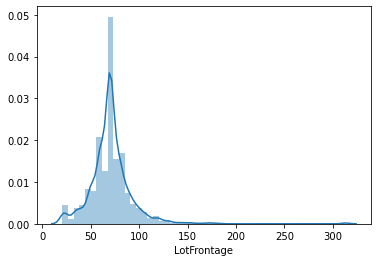

In [22]:
sns.distplot(train_df[ContVar_list[1]])

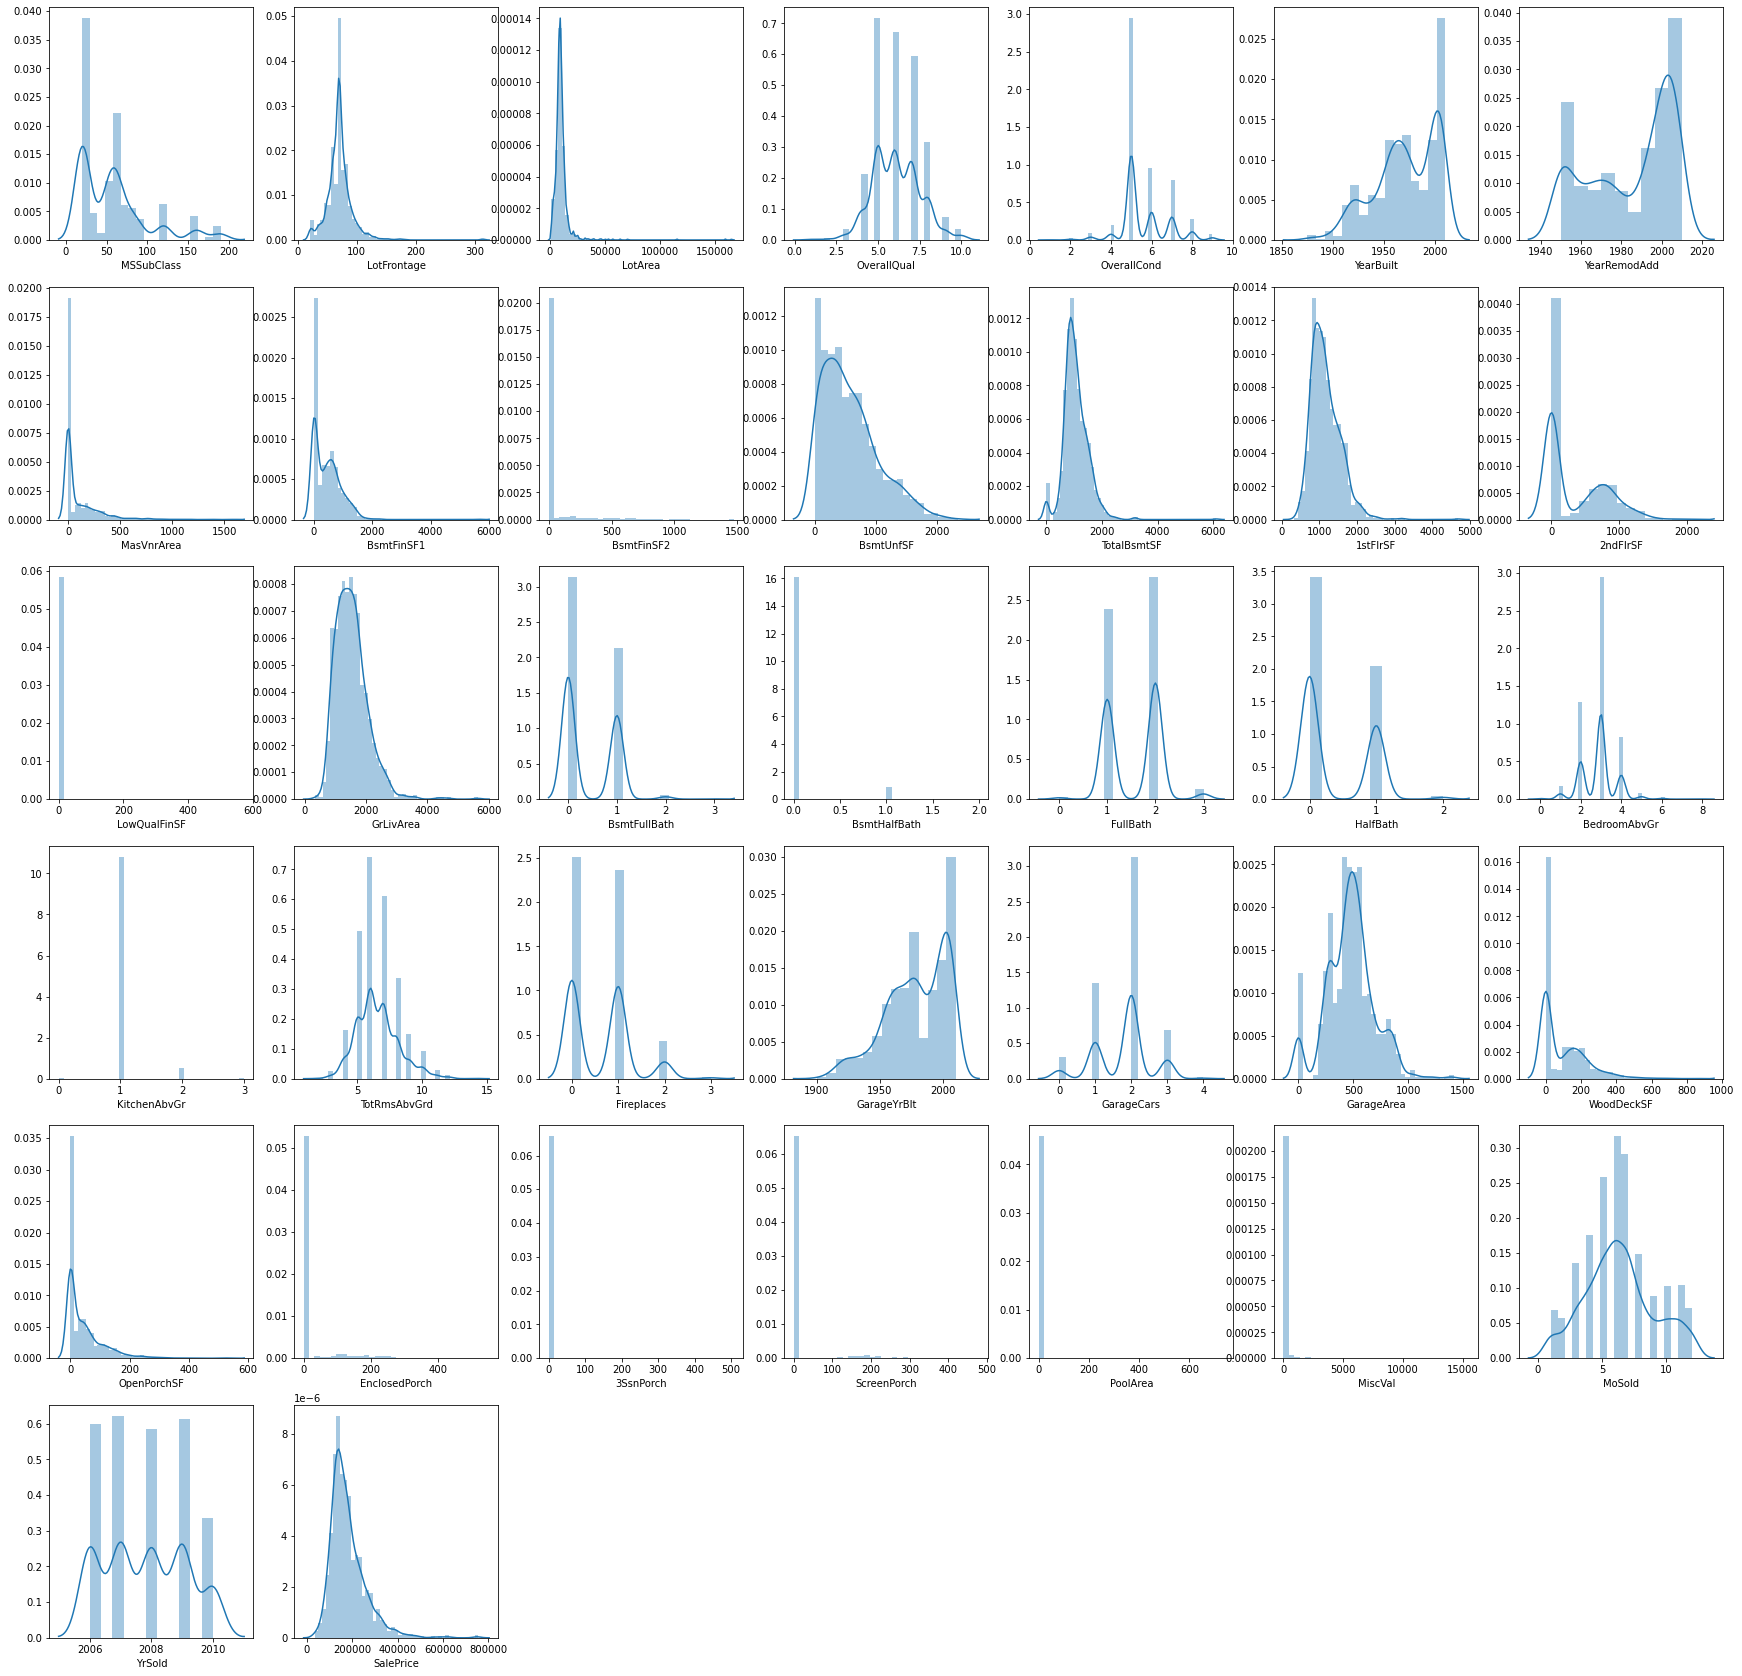

In [23]:
plt.figure(figsize=(30,30))
for iActiveCol in enumerate(ContVar_list):
    plt.subplot(6,7,iActiveCol[0]+1)
    sns.distplot(train_df[iActiveCol[1]])

Observations:

i. Garage Cars and Bedroom above garage are hoghly correlated with each other.

ii. As expected PoolArea, 3SsPorch, ScreenPorch, MiscVal have most of it's values as 0. 

iii. Most of the columns are not normaly distributed, they are highly skewed or have high kurotsis.

iv. Removing skewness is risky as we already have less data in hand to get generalized model.

In [24]:
print(DiscVar_list)
print("*"*100)
print(ContVar_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
****************************************************************************************************
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'F

In [25]:
train_df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

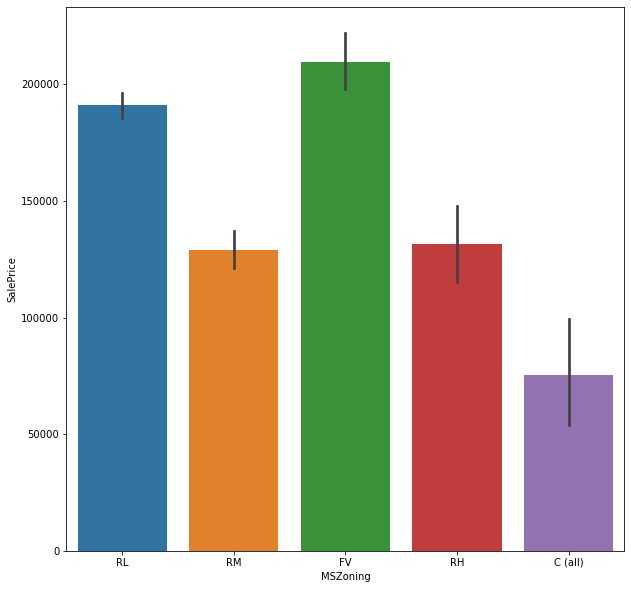

In [26]:
# Let's EDA using barplot
plt.figure(figsize=(10,10))
sns.barplot(x='MSZoning',y='SalePrice',data=train_df)
# FL and RV have higher saleprice than others

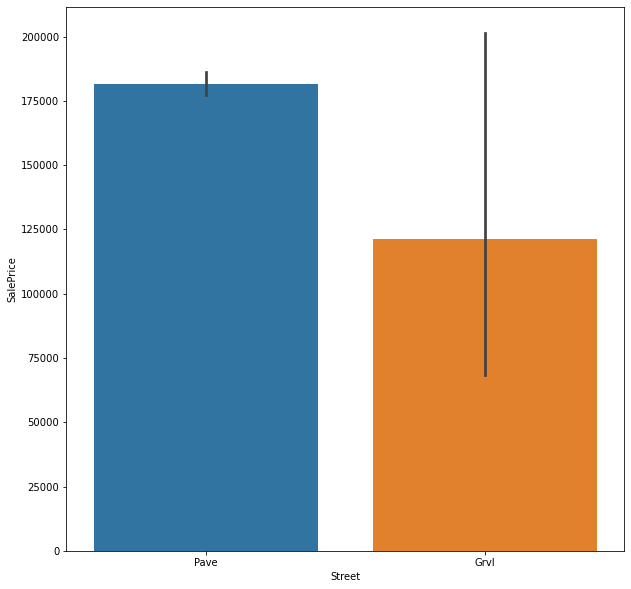

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x='Street',y='SalePrice',data=train_df)
# Pave have higher saleprice than the Grvl

In [28]:
train_df['Street'].value_counts()
# Only 4 points related to Grvl is available, which is totally undersampelled data.
# Though the difference in rates of grvl and Pave is significant, still iit might effect while generalizing the model.
# I will drop this column

Pave    1164
Grvl       4
Name: Street, dtype: int64

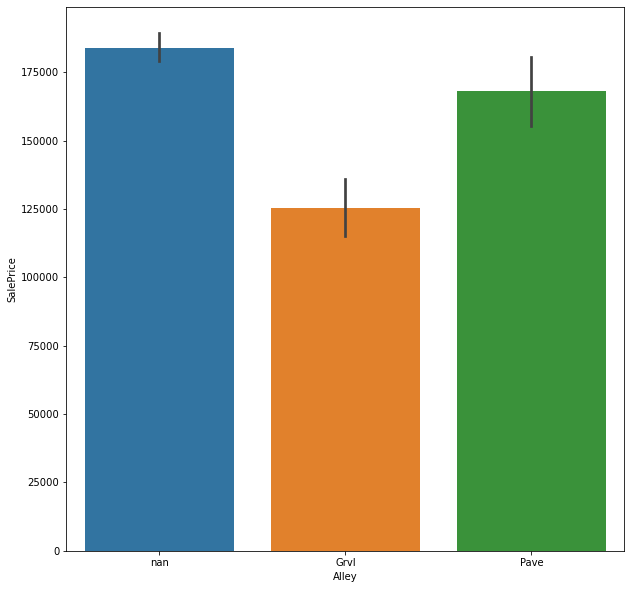

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='Alley',y='SalePrice',data=train_df)
#Alley is not giving much of insightful info as Street

In [30]:
train_df['Alley'].value_counts()
# Again an example of undersampelling.

nan     1091
Grvl      41
Pave      36
Name: Alley, dtype: int64

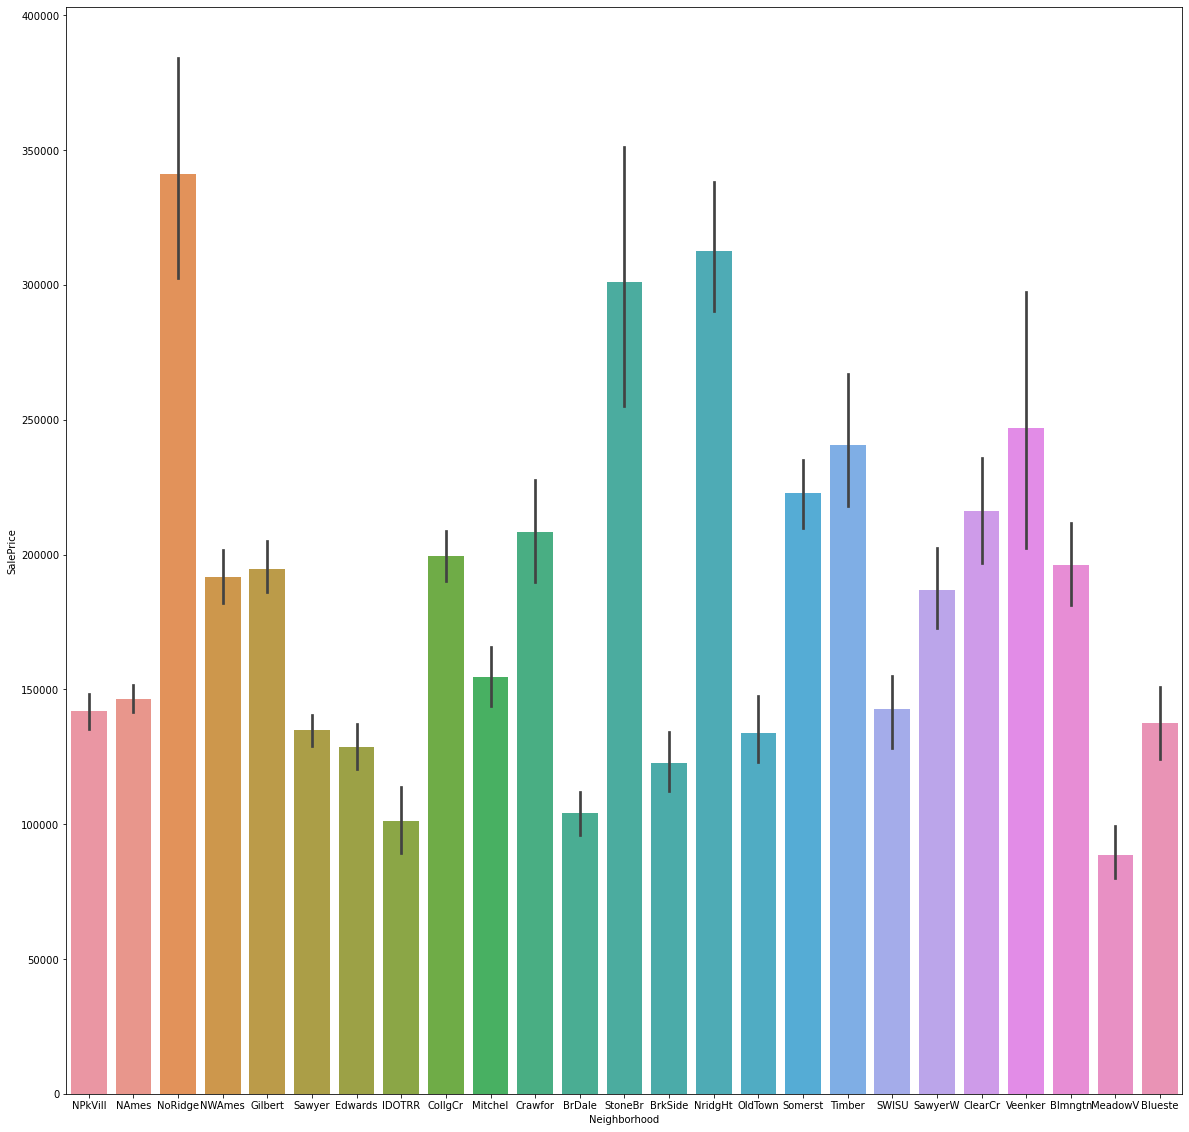

In [31]:
plt.figure(figsize=(20,20))
sns.barplot(x='Neighborhood',y='SalePrice',data=train_df)

In [32]:
train_df['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


[]

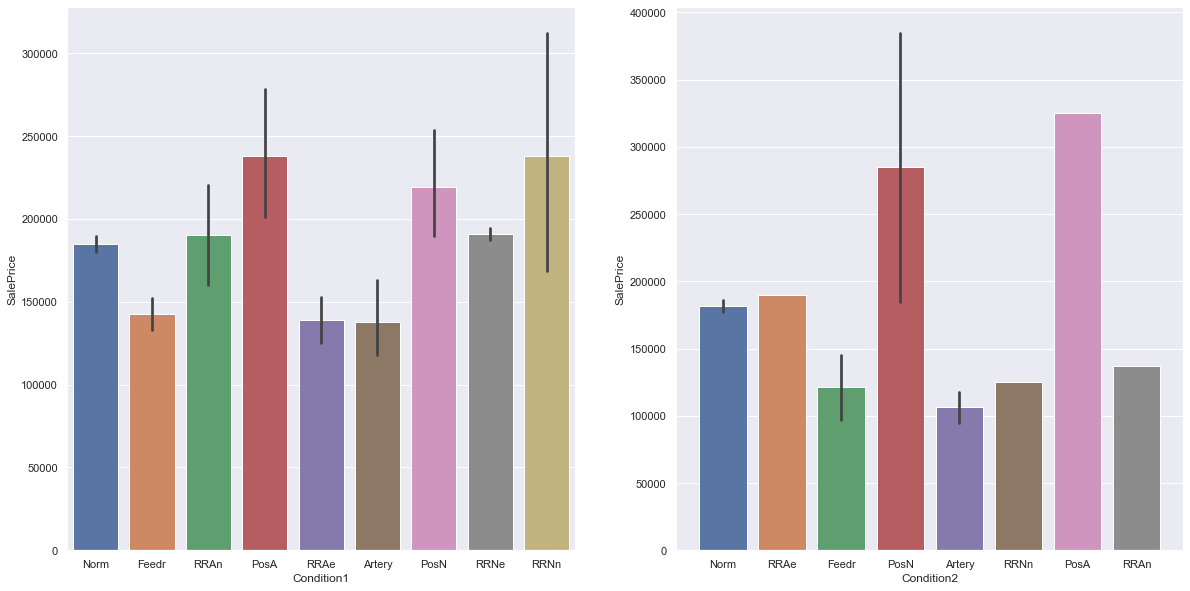

In [33]:
print(train_df['Condition2'].value_counts())
print(train_df['Condition2'].value_counts())
sns.set(rc={"figure.figsize": (20, 10)})
fig,SPs=plt.subplots(1,2)
sns.set_style('whitegrid')
sns.barplot(x='Condition1',y='SalePrice',data=train_df,ax=SPs[0])
sns.set_style('whitegrid')
sns.barplot(x='Condition2',y='SalePrice',data=train_df,ax=SPs[1])
plt.plot()

#Condition2 is giving us better understanding and significant difference in rates amongst different categories.
# But as we can see, data is not imbalanced in case of both variables. To come to any final conclusion is highly
#  risky. We might endup dropping this column.


1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


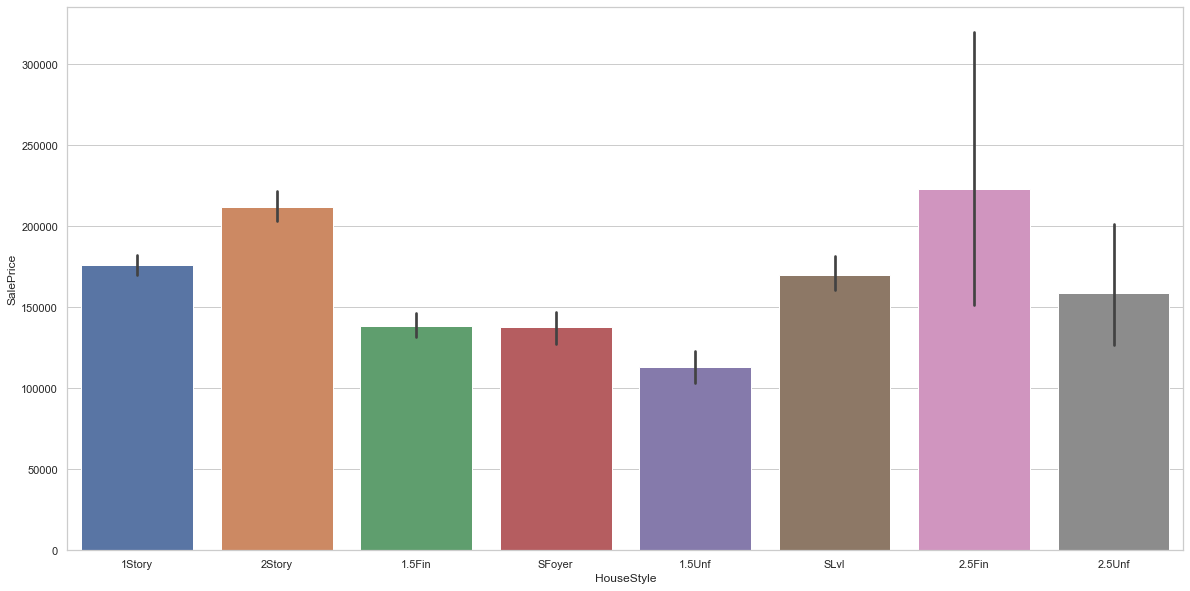

In [34]:
print(train_df['HouseStyle'].value_counts())
sns.barplot(x='HouseStyle',y='SalePrice',data=train_df)
#House style with 2.5fin have higher rates than other styles.
#1.5Unf have lower rates.
# 1 story and 2story houses have significant difference and total records provided to us are 578 amd 361, so we
#  can rely on our observations for the time being.

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


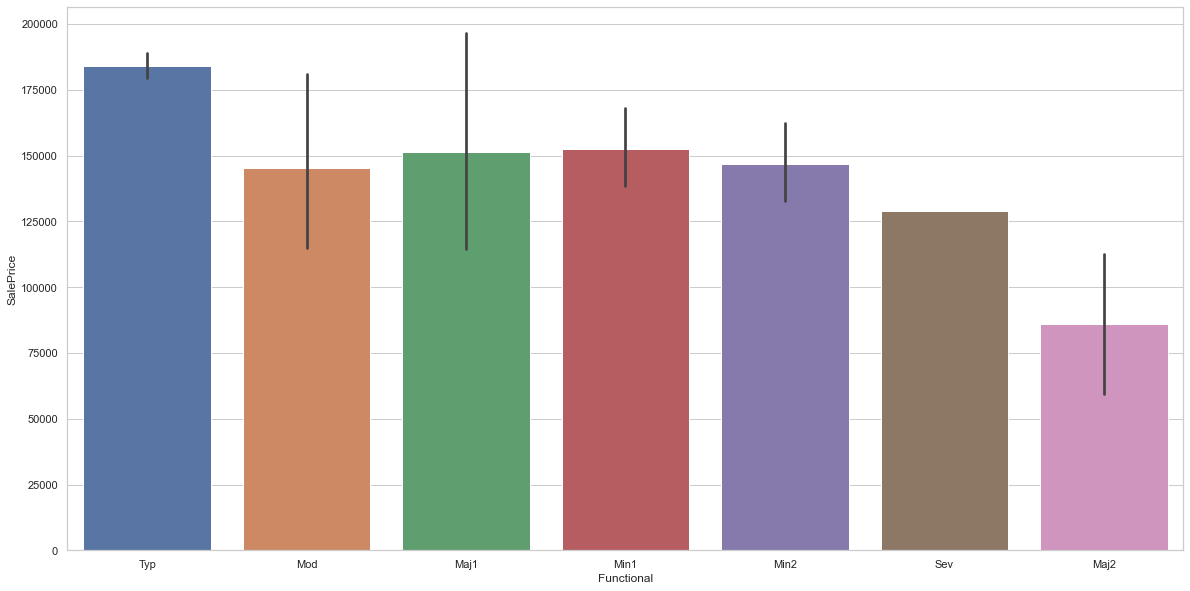

In [35]:
print(train_df['Functional'].value_counts())
sns.barplot(x='Functional',y='SalePrice',data=train_df)
#Typical condition has higher rates as expected


WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


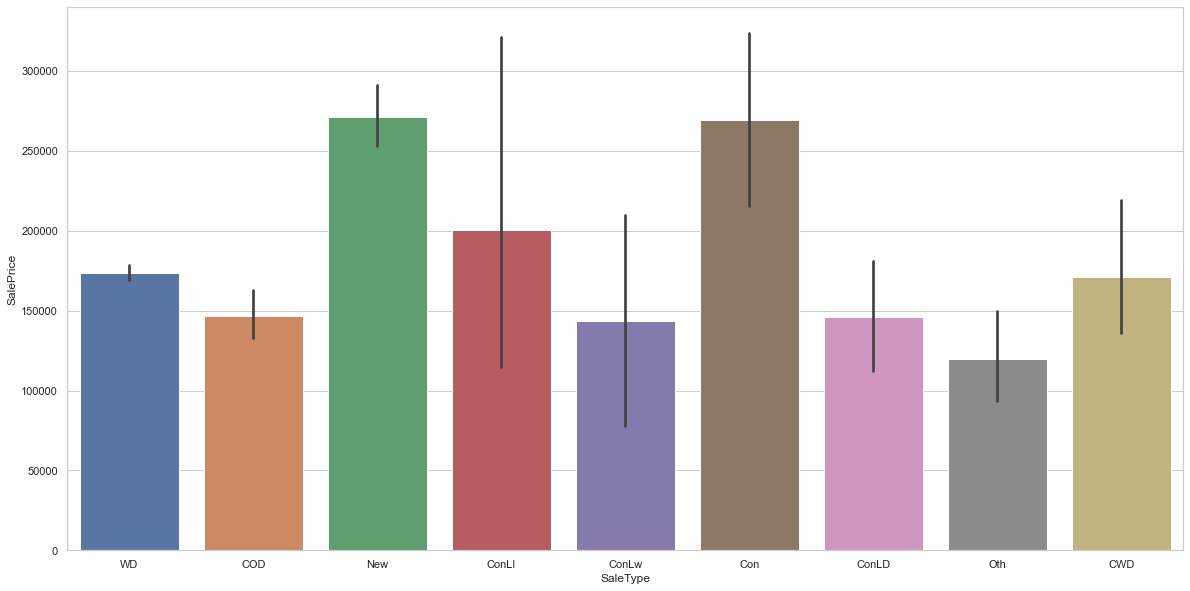

In [36]:
print(train_df['SaleType'].value_counts())
sns.barplot(x='SaleType',y='SalePrice',data=train_df)

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


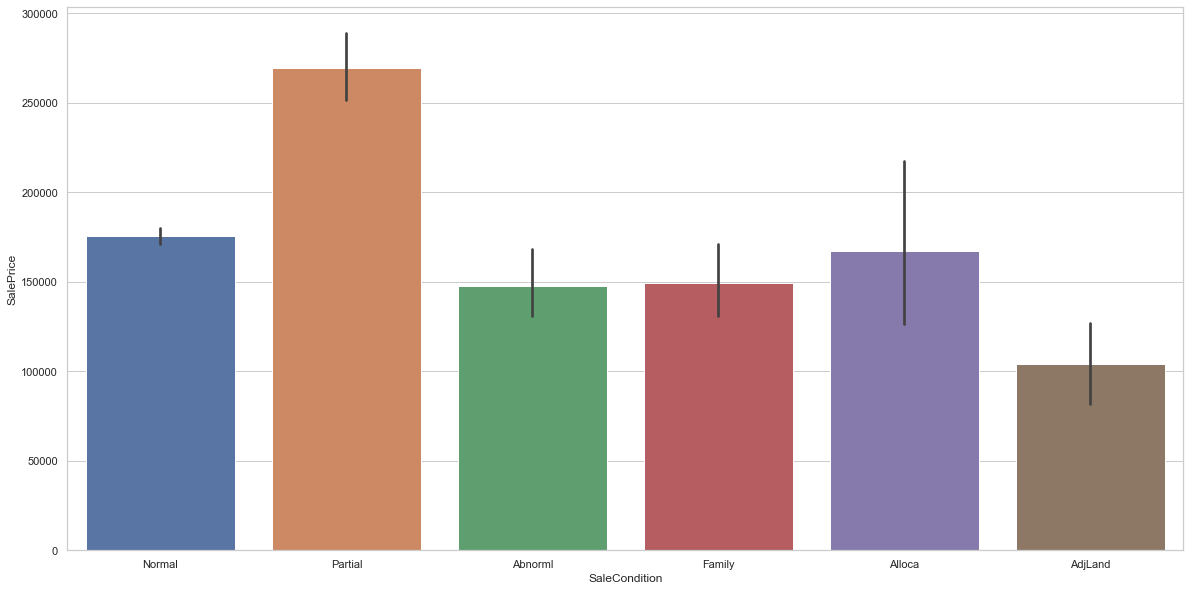

In [37]:
print(train_df['SaleCondition'].value_counts())
sns.barplot(x='SaleCondition',y='SalePrice',data=train_df)
#Partial sale condition has higher sale price

Y    1090
N      78
Name: CentralAir, dtype: int64


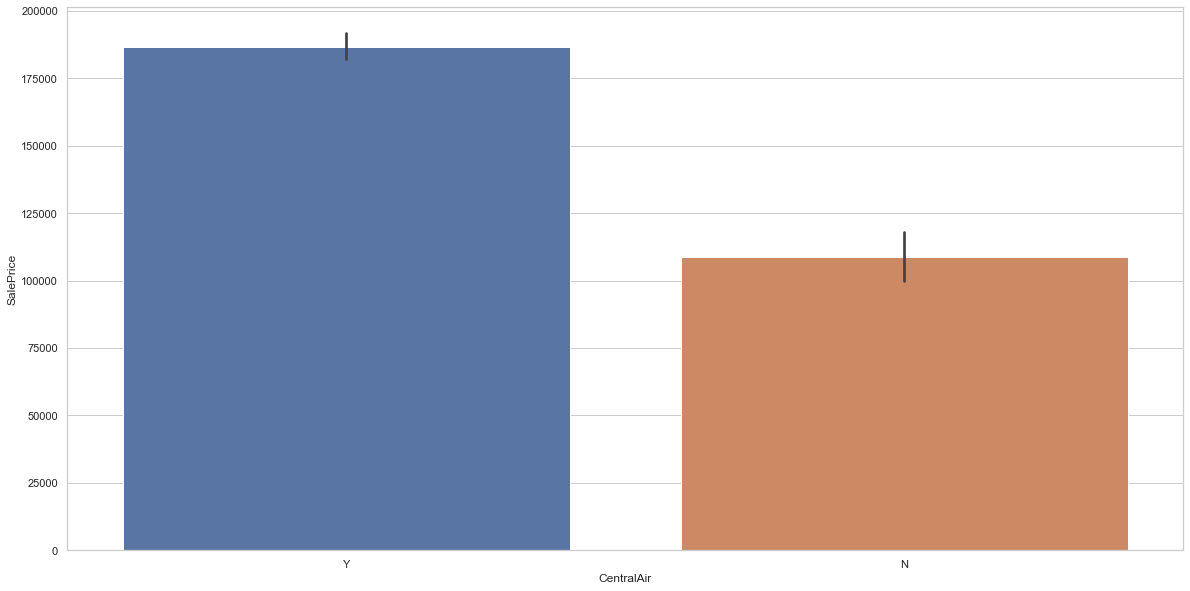

In [38]:
print(train_df['CentralAir'].value_counts())
sns.barplot(x='CentralAir',y='SalePrice',data=train_df)
#Difference is significant in Central air Y and N. It's an important feature for prediction.

### Bivariate Analysis

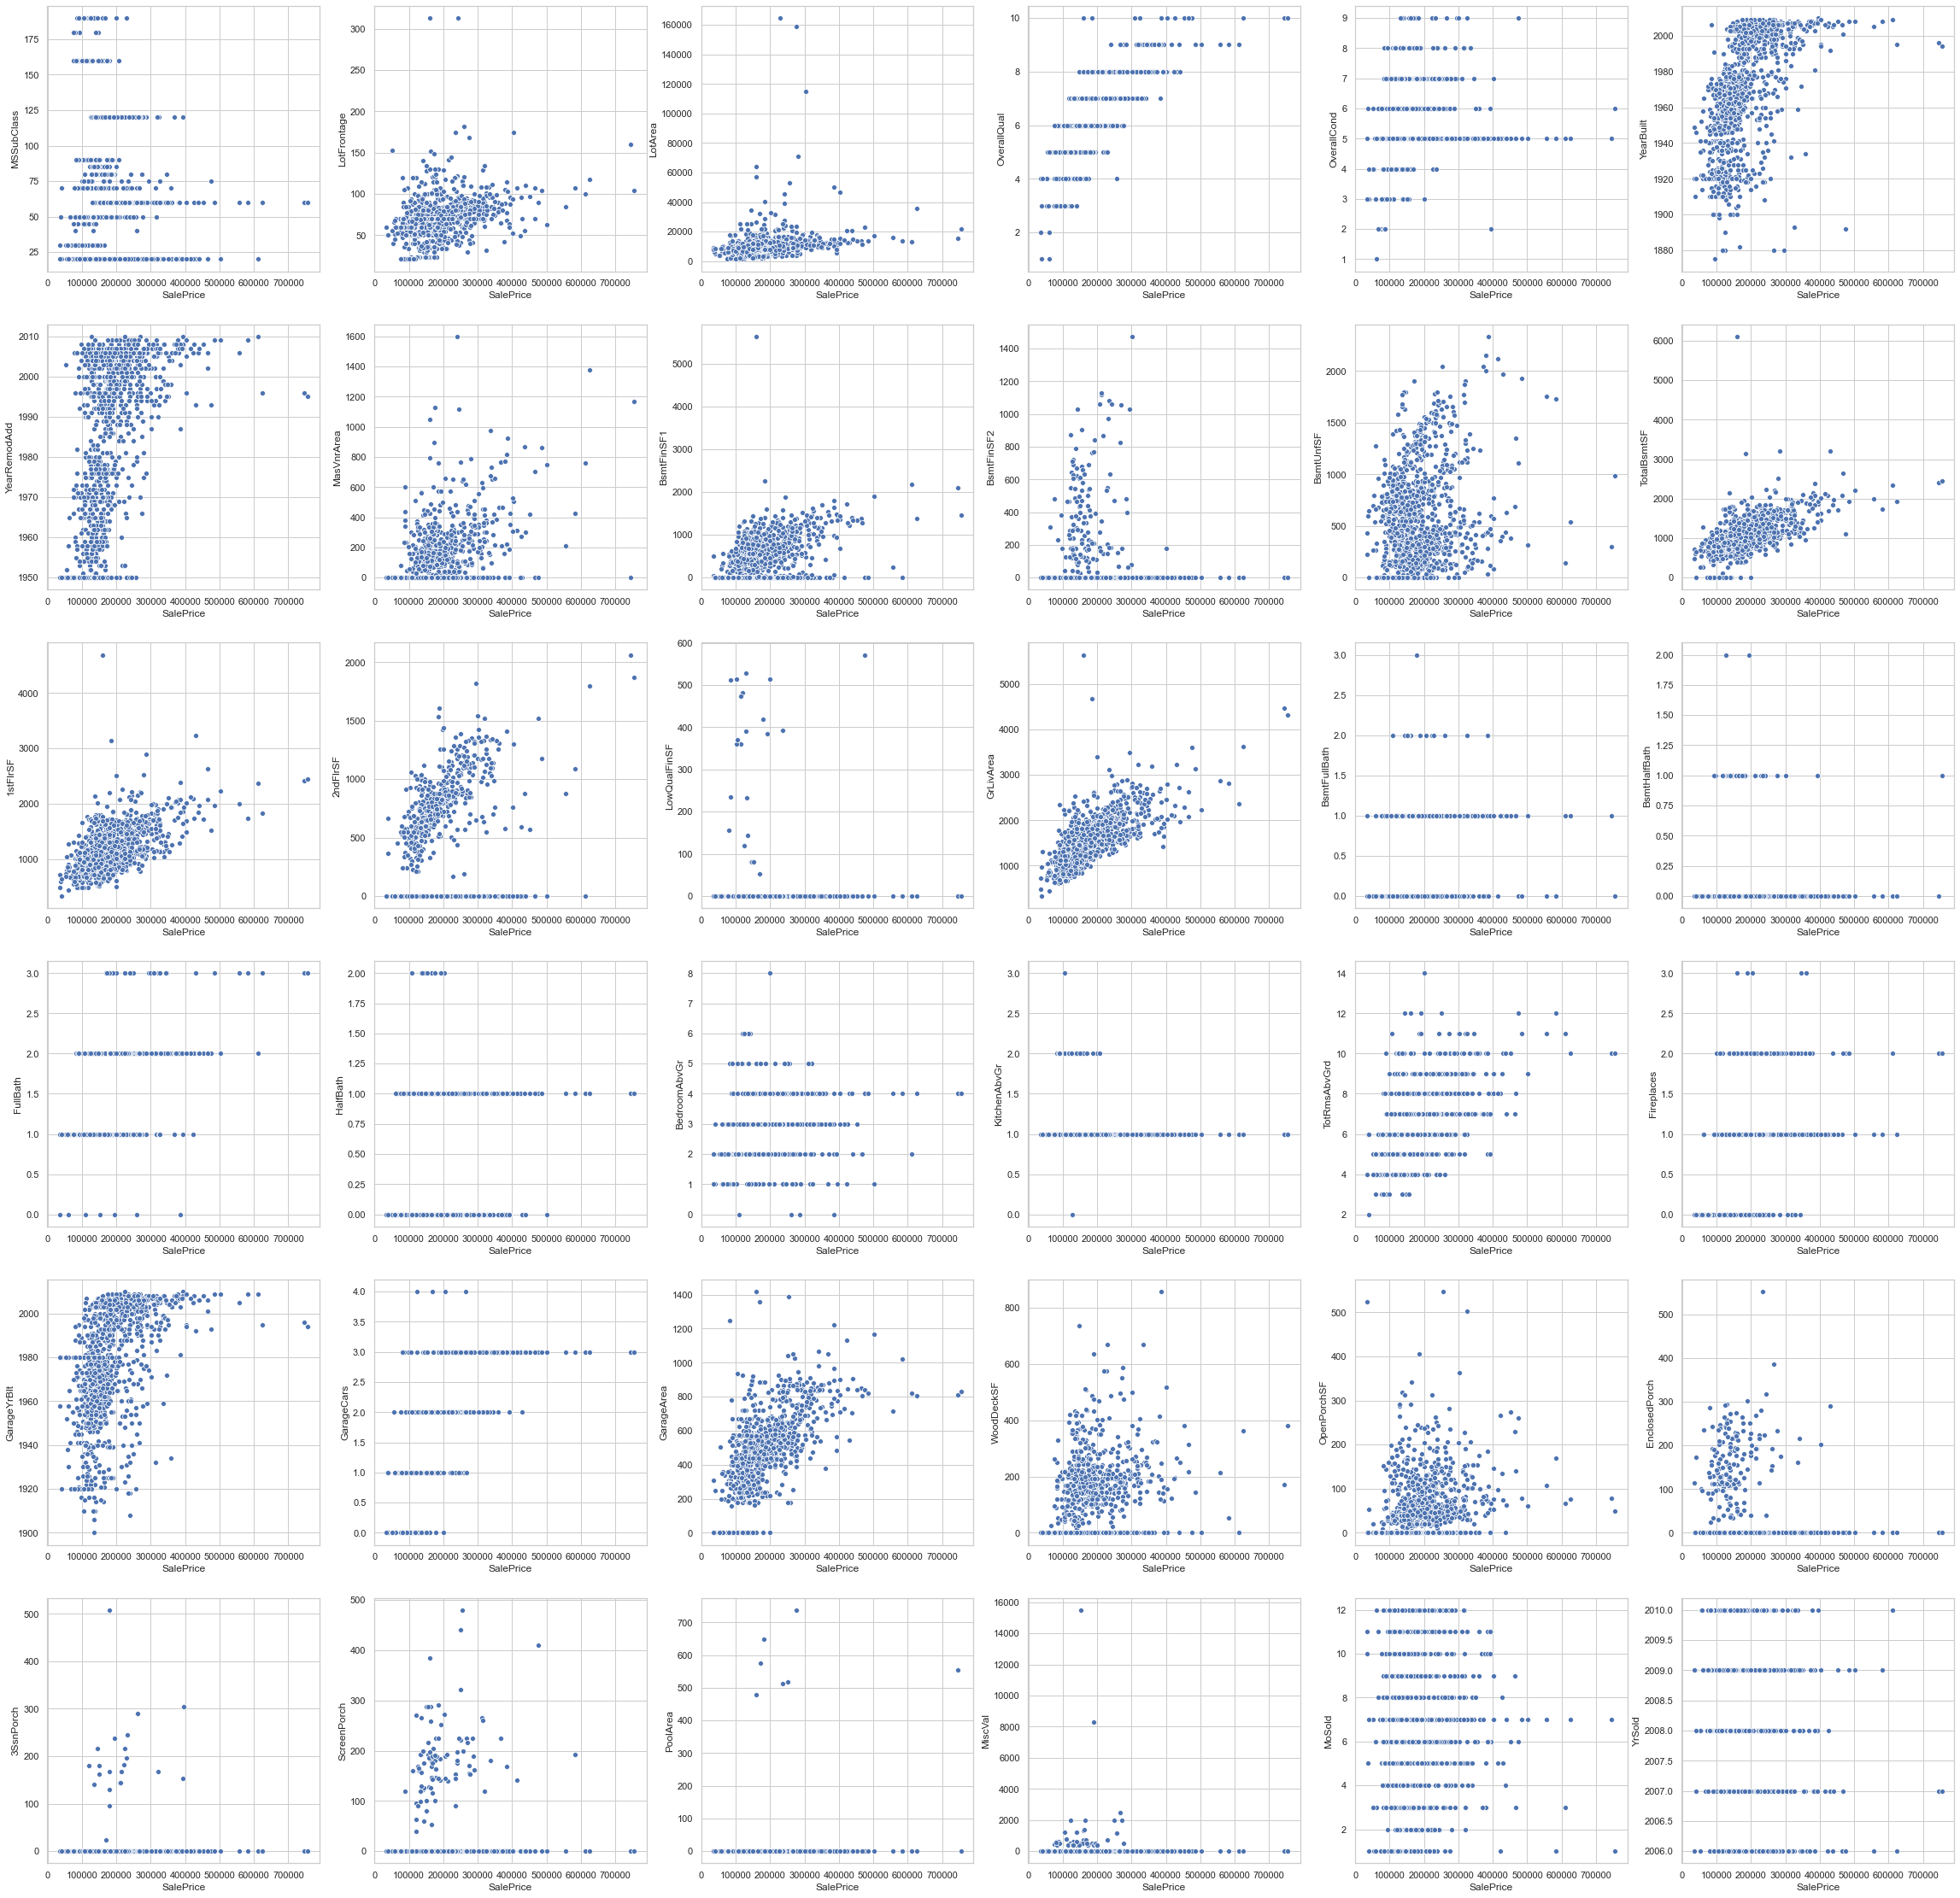

In [39]:
plt.figure(figsize=(40,40))
for iActiveCol in enumerate(ContVar_list):
    if iActiveCol[1]!= 'SalePrice':
        plt.subplot(6,6,iActiveCol[0]+1)
        sns.scatterplot(x='SalePrice',y=iActiveCol[1],data=train_df)

Observation:

i. Features lotFrontage, TotalBsmtsF, TotalBsmtsF1, GrLivArea and 1stFlrSF are highly correlated to SalePrice

ii. Above mentioned features are going to be key factors in predicting SalePrice.

In [40]:
# As we observed skewness is present in data
# Let's check skewness value and then remove it if required
train_df.skew()
# As we can see skewness is present in most of the continuous independent variables.

MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [41]:
i=1/(1+np.log(train_df['GarageCars']))
pd.Series(i).skew()

-0.29615139454135814

In [42]:
# Let's remove skewness from highly skewed columns
# I will be using 1/1+log(x) as we have 0 values in data, we might endup at having inf or -inf values.
# Box cox also works on strictly positive values.
# Amongst sqrt and 1/1+log(x), I decided to use 1/1+log(x)
Cols_ToBeSkewed=["LotArea","MiscVal","PoolArea","LowQualFinSF","3SsnPorch"]

for iActiveCol in Cols_ToBeSkewed:
    #For train data set
    NewSeries=pd.Series( 1/(1+np.log(train_df[iActiveCol])))
    train_df.drop(iActiveCol,inplace=True,axis=1)
    train_df[iActiveCol]=NewSeries

#We have removed skewness from train data

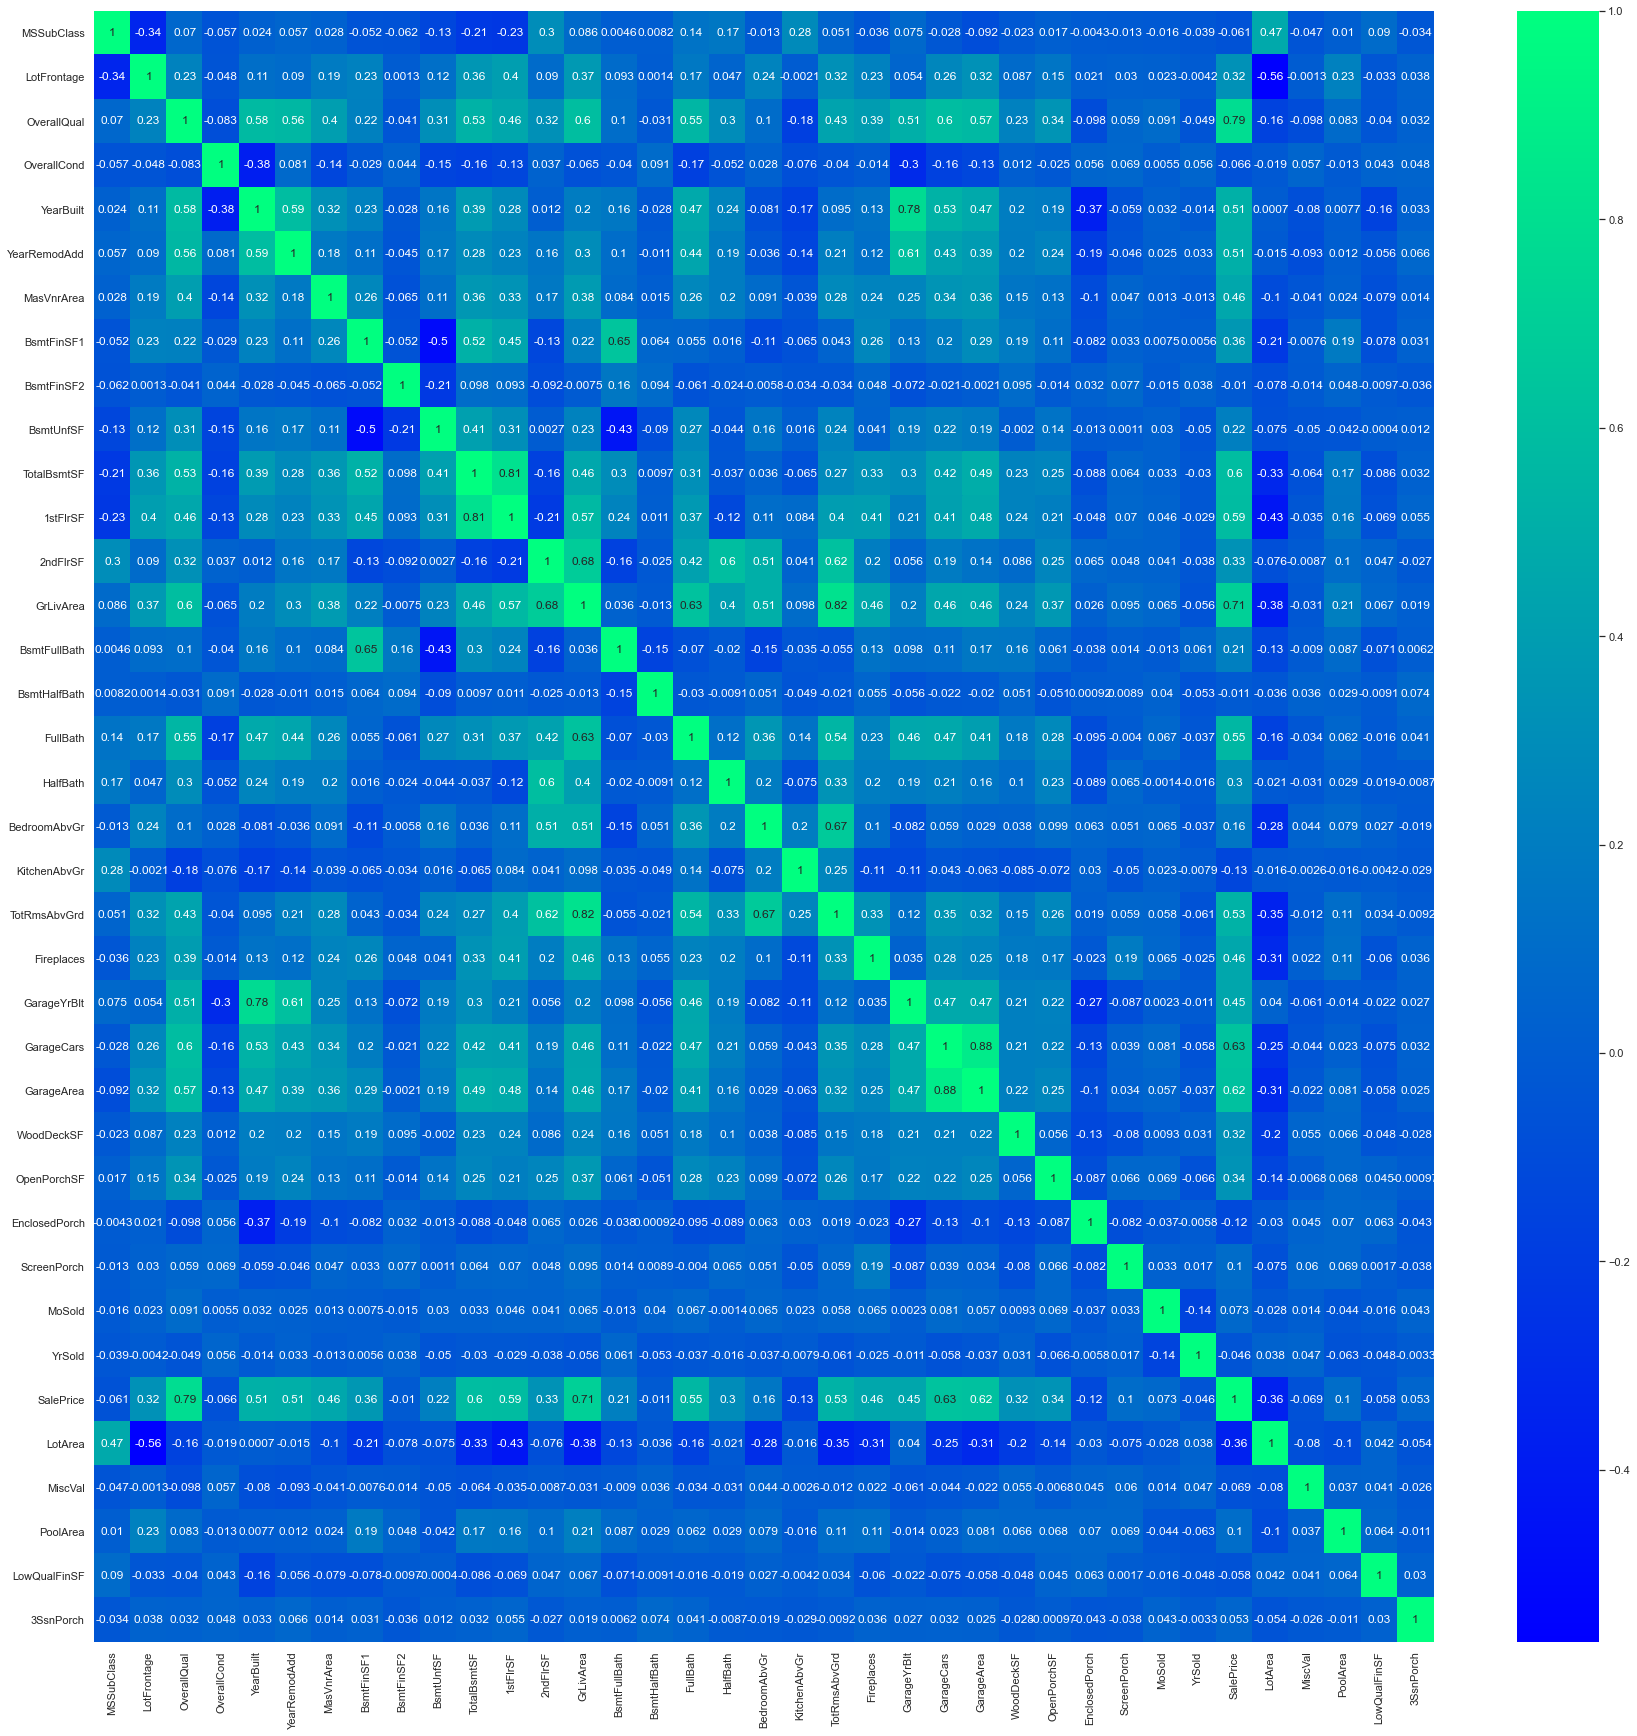

In [43]:
# Correlation matrix
plt.figure(figsize=(30,30))
corr_mat=train_df.corr()
sns.heatmap(corr_mat,annot=True,cmap='winter')

In [44]:
print(ContVar_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Feature Selection 

In [45]:
ContVars_TBR=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 
              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
              'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
              'PoolArea', 'MiscVal', 'MoSold','GrLivArea', 'YrSold']  #ContVars_TBR variables to be removed
train_df.drop(ContVars_TBR,inplace=True,axis=1)
test_df.drop(ContVars_TBR,inplace=True,axis=1)

In [46]:
train_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [47]:
print(DiscVar_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [48]:
#List of discrete variables to be removed
DiscreteVars_TBR=[ 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                  'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1', 
                  'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature']
train_df.drop(DiscreteVars_TBR,inplace=True,axis=1)
test_df.drop(DiscreteVars_TBR,inplace=True,axis=1)

In [49]:
train_df.shape

(1168, 13)

## Encoding

In [50]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding for train data set
New_df = OrdinalEncoder().fit_transform(train_df)
train_df=pd.DataFrame(New_df,columns=train_df.columns)

In [51]:
# Encoding for test data set
New_df = OrdinalEncoder().fit_transform(test_df)
test_df=pd.DataFrame(New_df,columns=test_df.columns)

In [52]:
train_df

MSZoning  Street  Neighborhood  HouseStyle  OverallQual  YearBuilt  \
0          3.0     1.0          13.0         2.0          5.0       75.0   
1          3.0     1.0          12.0         2.0          7.0       69.0   
2          3.0     1.0          15.0         5.0          6.0       95.0   
3          3.0     1.0          14.0         2.0          5.0       76.0   
4          3.0     1.0          14.0         2.0          5.0       76.0   
...        ...     ...           ...         ...          ...        ...   
1163       3.0     1.0          19.0         2.0          4.0       66.0   
1164       3.0     1.0           7.0         2.0          3.0       48.0   
1165       3.0     1.0          13.0         5.0          5.0       75.0   
1166       0.0     1.0           9.0         5.0          3.0       22.0   
1167       3.0     1.0           8.0         5.0          5.0      101.0   

      TotalBsmtSF  CentralAir  TotRmsAbvGrd  GarageCars  SaleType  \
0           286.0         1.0           3.0         2.0       8.0   
1           624.0         1.0           6.0         2.0       8.0   
2           312.0         1.0           6.0         2.0       8.0   
3           590.0         1.0           5.0         2.0       0.0   
4           537.0         1.0           6.0         2.0       8.0   
...           ...         ...           ...         ...       ...   
1163        173.0         1.0           3.0         1.0       8.0   
1164          0.0         1.0           3.0         2.0       8.0   
1165        157.0         1.0           5.0         2.0       8.0   
1166         54.0         0.0           4.0         1.0       8.0   
1167        115.0         1.0           5.0         2.0       8.0   

      SaleCondition  SalePrice  
0               4.0      129.0  
1               4.0      468.0  
2               4.0      470.0  
3               4.0      326.0  
4               4.0      379.0  
...             ...        ...  
1163            4.0      114.0  
1164            4.0       76.0  
1165            4.0      200.0  
1166            4.0        4.0  
1167            4.0      306.0  

[1168 rows x 13 columns]

## Normalizing the data

In [53]:
Y=train_df['SalePrice']
X=train_df.drop('SalePrice',axis=1)

In [54]:
# Normalizing train and test data
for col in X.columns:
    train_df[col]=(train_df[col]-min(train_df[col]))/(max(train_df[col])-min(train_df[col]))
    
for col in test_df.columns:
    test_df[col]=(test_df[col]-min(test_df[col]))/(max(test_df[col])-min(test_df[col]))

In [55]:
print(train_df.columns)
print(test_df.columns)

Index(['MSZoning', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'TotalBsmtSF', 'CentralAir', 'TotRmsAbvGrd', 'GarageCars',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'TotalBsmtSF', 'CentralAir', 'TotRmsAbvGrd', 'GarageCars',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Model Selection

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
MLAlgos_list=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),SVR(),GradientBoostingRegressor()]
for algo in MLAlgos_list:
    max_r2Score=0
    active_r2s=0
    iBest_rs=0
    model=algo
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        active_r2s=r2_score(pred,y_test)
        if active_r2s>max_r2Score:
            max_r2Score=active_r2s
            iBest_rs=iActive_rs
    print("Best r2 Score for {} algo is {} for random state {}.".format(algo,max_r2Score,iBest_rs))

Best r2 Score for LinearRegression() algo is 0.8167399729164273 for random state 84.
Best r2 Score for KNeighborsRegressor() algo is 0.5661582714709565 for random state 89.
Best r2 Score for DecisionTreeRegressor() algo is 0.7542970633929734 for random state 84.
Best r2 Score for AdaBoostRegressor() algo is 0.6875632399676515 for random state 54.
Best r2 Score for SVR() algo is 0 for random state 0.
Best r2 Score for GradientBoostingRegressor() algo is 0.8651310409929922 for random state 80.


In [58]:
# Gradient Boosting Classifier is giving best result. 
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300], 
           'loss':['ls', 'lad', 'huber', 'quantile']}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 200}


In [59]:
#Gradient boosting algorithm is giving best accuracy with approx 87% at random state 80
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingRegressor(criterion='mse',n_estimators=200,loss='huber'),X,Y,cv=5,scoring="r2").mean()
#We are not over or under fitting the model

0.8517630612903986

In [60]:
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=200,loss='huber')
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=80,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)
print(r2_score(y_test,pred))

0.8814332662973575


In [61]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_Housing.pkl')

['GradBoost_Housing.pkl']

## Predicting for test data set

In [62]:
desiredFeatures=list(train_df.columns)

In [63]:
desiredFeatures.remove('SalePrice')

In [64]:
test_df=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Project-Housing_splitted/test.csv")
train_df=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Project-Housing_splitted/train.csv")

In [65]:
print(desiredFeatures)

['MSZoning', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'CentralAir', 'TotRmsAbvGrd', 'GarageCars', 'SaleType', 'SaleCondition']


In [67]:
train_data = train_df[desiredFeatures]
test_data = test_df[desiredFeatures]

# Get Independent and target variable to fit our generalized model

target=train_df['SalePrice']


In [69]:
# encoding
train_data=OrdinalEncoder().fit_transform(train_data)
test_data=OrdinalEncoder().fit_transform(test_data)

In [70]:
# Get the best weights using the Gradient boosting model on train data set
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=200,loss='huber')
gbm.fit(train_data,target)

GradientBoostingRegressor(criterion='mse', loss='huber', n_estimators=200)

In [72]:
# Predict house prices
predictions=gbm.predict(test_data)

In [77]:
test_data=pd.DataFrame(test_data,columns=desiredFeatures)

In [78]:
# Store predicted values in new column
test_data['Predicted_SalePrice']=predictions

In [79]:
#Store it in test.csv file
test_data.to_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Project-Housing_splitted/test.csv")

## Conclusion

i. We are predicting SalePrice of house which is a continuous variable, it’s a regression problem.

ii. Data set contained outliers and missing values. Handled missing values by imputing mean and mode for continuous and categorical variables, respectively. Whereas, to handle outliers used logarithmic function to reduce the effect of outliers.
     
iii. After EDA and feature selection we ended up with 12 relevant features, which are correlated to output variables.

iv. 'MSZoning', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'CentralAir', 'TotRmsAbvGrd’, 'GarageCars', 'SaleType', 'SaleCondition’ are important features. As we expected above features are supposed to be important when comes to personal house features as well. EDA proven to be in right direction intuitionally as well.
      
v. Gradient boosting is came out to be best fit algorithm with accuracy of 87%, cross validation score of 85%.
